In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Classification

In [2]:
# Classification - target is 'this' or 'not that' - discrete, qualitative outcomes
    # represented using a binary variable
# regression - target continuosyly varying variable
# features= predictor variables = Independent Variables
# Target Variables = dependent variable = response variables

In [3]:
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris) # bunch - similar to key, val in dict

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
type(iris.data), type(iris.target) # data and target are numoy arrays

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape # 150 rows/samples and 4 columns/features

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris.data
y = iris.target

In [9]:
# build dataframe from the numpy arrays
df = pd.DataFrame(X, columns=iris.feature_names)

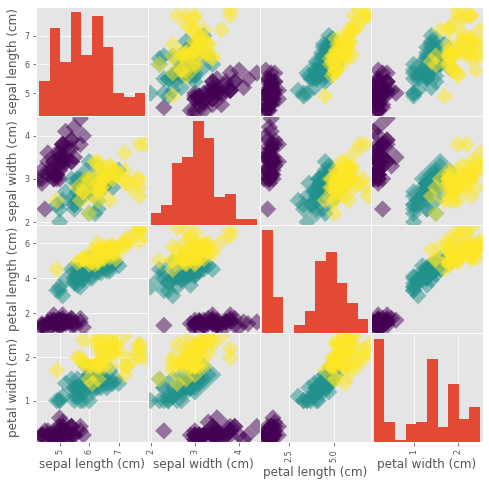

In [10]:
#visualizing the dataset
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[8,8], s=150, marker='D')
# c- colored by species
# s - marker size
# diagonal - histograms of the features c
# offdiagonal features - scatter plot of column feature vs row feature colored by target vairable

# k-NN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [12]:
iris['data'].shape

(150, 4)

In [13]:
iris['target'].shape

(150,)

In [16]:
X_new = np.array([[5.6,2.8,3.9,1.1],
                 [5.7,2.6,3.8,1.3],
                 [4.7,3.2,1.3,0.2]]) #features in columns and observations in rows

In [17]:
prediction = knn.predict(X_new)

In [19]:
X_new.shape # 3 rows, 4 rows

(3, 4)

In [21]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


In [22]:
# Measuring model performance

In [23]:
#Accuracy - fraction of correct predictions

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# startify - to distribute the lables in the test and train data

In [27]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Test set predictions: {}'.format(y_pred))

Test set predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [28]:
#to check the accuracy, we use the score method
knn.score(X_test, y_test)

0.9555555555555556

In [29]:
# larger k - smoother decision boundary - less complex model
# smaller k - more complex model - can lead to complexity

In [30]:
knn.score(X_train, y_train)

0.9809523809523809

[]

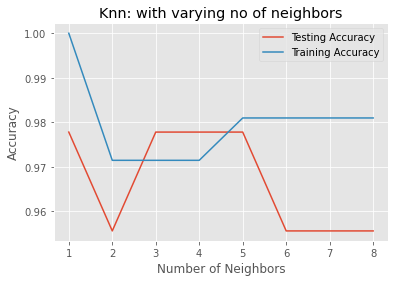

In [31]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title("Knn: with varying no of neighbors")
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.plot()


# Regression

In [33]:
# target value is a continuously varying variable eg GDP, price of a house

In [43]:
boston = datasets.load_boston()
type(boston)


sklearn.utils.Bunch

In [44]:
X = boston.data
y = boston.target

In [45]:
df = pd.DataFrame(X, columns=boston.feature_names)

In [49]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [64]:
#Trying to predict from the one feature(RM column)
X_rooms = X[:,5]

In [52]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [53]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

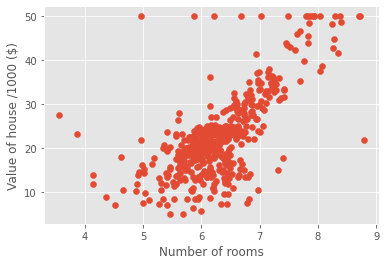

In [54]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

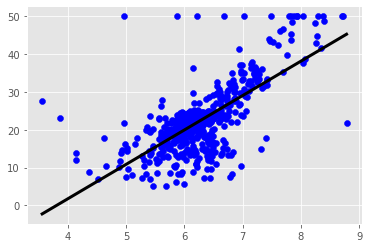

In [57]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [65]:
# y = ax + b
# y -> target
# x -> single feature
# a,b -> parameters of the model
# then define a loss/ cost function that minimizes the error
# the loss function is the sum of the squares of the residuals aka OLS - Ordinary least square


In [66]:
# Linear Regression on all features

In [67]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [68]:
# the default scoring method for linear regression is called R squared
# quantifies the variance
reg_all.score(X_test, y_test)

0.711226005748496

In [69]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.638689926172797


In [ ]:
# cross-validation
# begin by splitting dataset into 5 groups
# then the first group as test set and remaining 4 groups predicting on the 1st set and other metrics
# then the 2nd dataset as testset and remaing as trainign and predict on the test set and compute matric of interest
# do the same for the 3rd, 4th and 5th